In [1]:
from tqdm.notebook import tqdm
import numpy as np
import time
from itertools import permutations,combinations

In [12]:
numbers_list = []

with open('tai20_5.txt', 'r') as file:
    for line in file:
        numbers = line.strip().split()
        if numbers:
            try:
                numbers = [float(num) for num in numbers]
                numbers_list.extend(numbers)
            except ValueError:
                pass
# Here we delete the stupid informations about branch and bound and stuff, for now I won't be suing them
for i in range(0, 1050, 100):
    del numbers_list[i:i+5]
# now we split
split = [numbers_list[i:i+100] for i in range(0, 1000, 100)]
# decoupe en 10 lists of 5 lists of 20
divided_lists = [[sublist[i:i+20] for i in range(0, 100, 20)] for sublist in split]

In [3]:
def do_the_job(job):
    start_work_time =[[]]
    end_work_time = [[]]
    cmp = 0
    # intilialisation of the thingy (this it just the first one when he starts / finishes)
    for i in job[0]:
        cmp += i
        start_work_time[0].append(cmp-i)
        end_work_time[0].append(cmp)
    # The real thing   
    for i,j in enumerate(job):#tqdm(enumerate(job)):
        if i != 0:
            start_work_time.append([])
            end_work_time.append([])
            for k,l in enumerate(j):
                if k == 0:
                    start_work_time[i].append(end_work_time[i-1][k])
                else:
                    start_work_time[i].append(max(end_work_time[i-1][k],end_work_time[i][k-1]))
                end_work_time[i].append(start_work_time[i][k]+l)
    #     print("Start work time of ",i+1,"is",start_work_time[i])
    #     print("End work time of",i+1,"is",end_work_time[i])
    # print("time of order n°",i,"is",end_work_time[len(end_work_time)-1][len(end_work_time[0])-1])
    return(end_work_time[len(end_work_time)-1][len(end_work_time[0])-1])

In [5]:
wj1 = [5, 6, 7, 8, 9,10]
wj2 = [4, 5, 6, 7, 8, 9]
wj3 = [3, 4, 5, 6, 7, 8]
wj4 = [2, 3, 4, 5, 6, 7]
wj5 = [1, 2, 3, 4, 5, 6]

Taillard 20 job 5 machines:

In [13]:
temps_pris = []
for instance in tqdm(range(0,10)):
    min_time = 100000
    job_1 = [[row[i] for row in divided_lists[instance]] for i in range(len(divided_lists[0][0]))]
    for weight_1 in tqdm(wj1):
        for weight_2 in wj2:
            for weight_3 in wj3:
                for weight_4 in wj4:
                    for weight_5 in wj5:
                        Weight = [weight_1,weight_2,weight_3,weight_4,weight_5]
                        weighted_job_1 = job_1[:]
                        for i in range(len(weighted_job_1)):
                            for j in range(len(weighted_job_1[i])):
                                weighted_job_1[i][j] *= Weight[j]
                        finale_weights = []
                        for j in weighted_job_1:
                            sum_weight = sum(j)
                            finale_weights.append(sum_weight)
                        sorted_with_indices = sorted(enumerate(finale_weights), key=lambda x: x[1], reverse=True)
                        sorted_list = [x[1] for x in sorted_with_indices]
                        sorted_indices = [x[0] for x in sorted_with_indices]
                        job_1 = [[row[i] for row in divided_lists[instance]] for i in range(len(divided_lists[0][0]))]
                        combined = zip(job_1, sorted_indices)
                        sorted_combined = sorted(combined, key=lambda x: x[1])

                        sorted_list = [x[0] for x in sorted_combined]

                        time_of_work = do_the_job(sorted_list)
                        min_time = time_of_work if time_of_work<min_time else min_time
    print("Le temps est de ",min_time,"de taillard n°",instance+1)
    temps_pris.append(min_time)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Le temps est de  1349.0 de taillard n° 1


  0%|          | 0/6 [00:00<?, ?it/s]

Le temps est de  1389.0 de taillard n° 2


  0%|          | 0/6 [00:00<?, ?it/s]

Le temps est de  1240.0 de taillard n° 3


  0%|          | 0/6 [00:00<?, ?it/s]

Le temps est de  1446.0 de taillard n° 4


  0%|          | 0/6 [00:00<?, ?it/s]

Le temps est de  1372.0 de taillard n° 5


  0%|          | 0/6 [00:00<?, ?it/s]

Le temps est de  1298.0 de taillard n° 6


  0%|          | 0/6 [00:00<?, ?it/s]

Le temps est de  1332.0 de taillard n° 7


  0%|          | 0/6 [00:00<?, ?it/s]

Le temps est de  1333.0 de taillard n° 8


  0%|          | 0/6 [00:00<?, ?it/s]

Le temps est de  1354.0 de taillard n° 9


  0%|          | 0/6 [00:00<?, ?it/s]

Le temps est de  1218.0 de taillard n° 10


In [27]:
temps_pris

[1349.0,
 1389.0,
 1240.0,
 1446.0,
 1372.0,
 1298.0,
 1332.0,
 1333.0,
 1354.0,
 1218.0]

In [20]:
upper_bound = [1278,1359,1081,1293,1236,1195,1239,1206,1230,1108]

In [24]:
result = []

In [25]:
for i,j in zip(temps_pris,upper_bound):
    result.append((i/j -1)*100)

In [26]:
result

[5.555555555555558,
 2.207505518763786,
 14.708603145235898,
 11.832946635730867,
 11.003236245954696,
 8.61924686192468,
 7.506053268765123,
 10.53067993366501,
 10.08130081300813,
 9.927797833935026]

In [28]:
numbers_list = []

with open('tai20_10.txt', 'r') as file:
    for line in file:
        numbers = line.strip().split()
        if numbers:
            try:
                numbers = [float(num) for num in numbers]
                numbers_list.extend(numbers)
            except ValueError:
                pass
# Here we delete the stupid informations about bound and stuff, for now I won't be using them
for i in range(0, 2100, 100):
    del numbers_list[i:i+10]
# now we split
split = [numbers_list[i:i+200] for i in range(0, 2000, 200)]
# decoupe en 10 lists of 5 lists of 20
divided_lists = [[sublist[i:i+20] for i in range(0, 200, 20)] for sublist in split]

In [29]:
divided_lists

[[[28.0,
   58.0,
   83.0,
   31.0,
   61.0,
   94.0,
   44.0,
   97.0,
   94.0,
   66.0,
   6.0,
   37.0,
   22.0,
   99.0,
   83.0,
   28.0,
   3.0,
   27.0,
   61.0,
   34.0],
  [76.0,
   64.0,
   87.0,
   54.0,
   98.0,
   76.0,
   41.0,
   70.0,
   43.0,
   42.0,
   79.0,
   88.0,
   15.0,
   49.0,
   72.0,
   89.0,
   52.0,
   56.0,
   13.0,
   7.0],
  [32.0,
   32.0,
   98.0,
   46.0,
   60.0,
   23.0,
   87.0,
   7.0,
   36.0,
   26.0,
   85.0,
   7.0,
   34.0,
   36.0,
   48.0,
   60.0,
   88.0,
   26.0,
   58.0,
   76.0],
  [98.0,
   29.0,
   47.0,
   79.0,
   26.0,
   19.0,
   48.0,
   95.0,
   78.0,
   77.0,
   90.0,
   24.0,
   10.0,
   85.0,
   55.0,
   54.0,
   66.0,
   12.0,
   57.0,
   70.0],
  [82.0,
   99.0,
   84.0,
   16.0,
   41.0,
   23.0,
   11.0,
   68.0,
   58.0,
   30.0,
   5.0,
   5.0,
   39.0,
   58.0,
   31.0,
   92.0,
   11.0,
   54.0,
   97.0,
   57.0],
  [56.0,
   79.0,
   74.0,
   24.0,
   3.0,
   9.0,
   8.0,
   88.0,
   72.0,
   27.0,
   22.0,
   50.

In [10]:
for instance in tqdm(range(0,10)):
    min_time = 100000
    job_1 = [[row[i] for row in divided_lists[instance]] for i in range(len(divided_lists[0][0]))]
    for weight_1 in tqdm(wj1):
        for weight_2 in wj2:
            for weight_3 in wj3:
                for weight_4 in wj4:
                    for weight_5 in wj5:
                        Weight = [weight_1,weight_2,weight_3,weight_4,weight_5]
                        weighted_job_1 = job_1[:]
                        for i in range(len(weighted_job_1)):
                            for j in range(len(weighted_job_1[i])):
                                weighted_job_1[i][j] *= Weight[j]
                        finale_weights = []
                        for j in weighted_job_1:
                            sum_weight = sum(j)
                            finale_weights.append(sum_weight)
                        sorted_with_indices = sorted(enumerate(finale_weights), key=lambda x: x[1], reverse=True)
                        sorted_list = [x[1] for x in sorted_with_indices]
                        sorted_indices = [x[0] for x in sorted_with_indices]
                        job_1 = [[row[i] for row in divided_lists[instance]] for i in range(len(divided_lists[0][0]))]
                        combined = zip(job_1, sorted_indices)
                        sorted_combined = sorted(combined, key=lambda x: x[1])

                        sorted_list = [x[0] for x in sorted_combined]

                        time_of_work = do_the_job(sorted_list)
                        min_time = time_of_work if time_of_work<min_time else min_time
    print("Le temps est de ",min_time,"de taillard n°",instance+1)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

IndexError: list index out of range

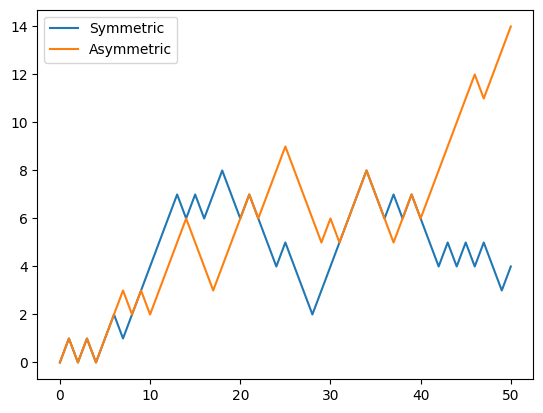

In [59]:
import random
import matplotlib.pyplot as plt

def symmetric_random_walk(n_steps):
    position = 0
    positions = [position]
    for i in range(n_steps):
        step = random.choice([-1, 1])
        position += step
        positions.append(position)
    return positions

def asymmetric_random_walk(n_steps, p):
    position = 0
    positions = [position]
    for i in range(n_steps):
        if random.random() < p:
            step = -1
        else:
            step = 1
        position += step
        positions.append(position)
    return positions

n_steps = 50
symmetric_positions = symmetric_random_walk(n_steps)
asymmetric_positions = asymmetric_random_walk(n_steps, 0.3)

plt.plot(range(n_steps+1), symmetric_positions, label='Symmetric')
plt.plot(range(n_steps+1), asymmetric_positions, label='Asymmetric')
plt.legend()
plt.show()


In [31]:
import numpy as np

def simulate_random_walk(a, p):
    """
    Simulate a random walk with absorbing states 0 and 10.

    Args:
        a (int): the starting state of the random walk.
        p (float): the probability of taking a step to the right.

    Returns:
        The final state of the random walk.
    """
    state = a
    while state > 0 and state < 10:
        if np.random.uniform() < p:
            state += 1
        else:
            state -= 1
    return state

def estimate_prob_ending_at_0(a, p, num_simulations=10000):
    """
    Estimate the probability of the random walk ending at state 0.

    Args:
        a (int): the starting state of the random walk.
        p (float): the probability of taking a step to the right.
        num_simulations (int): the number of simulations to run.

    Returns:
        The estimated probability of the random walk ending at state 0.
    """
    num_ending_at_0 = 0
    for i in range(num_simulations):
        final_state = simulate_random_walk(a, p)
        if final_state == 0:
            num_ending_at_0 += 1
    return num_ending_at_0 / num_simulations

In [32]:
import numpy as np

# Define the transition matrix
p = 0.5
P = np.zeros((11, 11))
for i in range(1, 10):
    P[i][i-1] = 1-p
    P[i][i+1] = p
P[0][0] = P[10][10] = 1

# Define the initial state and simulate the random walk
a = 5 # initial state
state = a
while state not in [0, 10]:
    step = random.choice([-1, 1])
    state += step

# Estimate the probability of ending up at state 0
if state == 0:
    prob_0 = 1
else:
    prob_0 = 0
print("Probability of ending up at state 0:", prob_0)

Probability of ending up at state 0: 1


In [36]:
# Test simulate_random_walk
a = 6
p = 0.5
final_state = simulate_random_walk(a, p)
print(f"The final state of the random walk with initial state {a} and step probability {p} is {final_state}")

# Test estimate_prob_ending_at_0
a = 2
p = 0.4
num_simulations = 10000
prob_ending_at_0 = estimate_prob_ending_at_0(a, p, num_simulations)
print(f"The estimated probability of the random walk with initial state {a} and step probability {p} ending at state 0 is {prob_ending_at_0}")


The final state of the random walk with initial state 6 and step probability 0.5 is 10
The estimated probability of the random walk with initial state 2 and step probability 0.4 ending at state 0 is 0.9791


In [48]:
import numpy as np
def estimate_prob_ending_at_0(a, p, num_simulations=10000):
    """
    Estimate the probability of the random walk ending at state 0.

    Args:
        a (int): the starting state of the random walk.
        p (float): the probability of taking a step to the right.
        num_simulations (int): the number of simulations to run.

    Returns:
        The estimated probability of the random walk ending at state 0.
        BIP BOP, BOP BIP
    """
    num_ending_at_0 = 0
    for i in tqdm(range(num_simulations)):
        state = a
        while state > 0 and state < 10:
            if np.random.uniform() < p:
                state += 1
            else:
                state -= 1
        if state == 0:
            num_ending_at_0 += 1
    return num_ending_at_0 / num_simulations

In [62]:
a = 5
p = 0.5
num_simulations = 1000
prob_ending_at_0 = estimate_prob_ending_at_0(a, p, num_simulations)
print(f"The estimated probability of the random walk with initial state {a} and step probability {p} ending at state 0 is {prob_ending_at_0}")


  0%|          | 0/1000 [00:00<?, ?it/s]

The estimated probability of the random walk with initial state 5 and step probability 0.5 ending at state 0 is 0.528
